In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from scipy import stats

In [12]:
dataset = pd.read_csv("HousePrice.csv")
f = ['Area','Room','Parking','Warehouse','Elevator','Address','Price']
df = dataset[f].dropna(axis = 0)
df.dtypes

Area          object
Room           int64
Parking         bool
Warehouse       bool
Elevator        bool
Address       object
Price        float64
dtype: object

In [13]:
#find number of non numeric value in 'Area'
df['Area'].str.isnumeric().value_counts()

True     3450
False       6
Name: Area, dtype: int64

In [14]:
#find non numeric value in 'Area'
df['Area'].loc[df['Area'].str.isnumeric() == False]

570       3,310,000,000 
709      16,160,000,000 
807               1,000 
1604      8,400,000,000 
2171              3,600 
2802      2,550,000,000 
Name: Area, dtype: object

In [15]:
#fix problem & convert str to int
df['Area'] = df['Area'].str.replace(',', '')
df['Area'] = pd.to_numeric(df['Area'], errors = 'coerce')

In [16]:
#drop outlier data
q1_df = df['Area'].quantile(0.25)
q3_df = df['Area'].quantile(0.75)

for i in df.index:
    if df.loc[i,'Area'] > (q3_df + 1.5*(q3_df - q1_df)):
        df.drop(i, inplace = True)
df.describe()

,Area,Room,Price
count,3219.000000,3219.000000,3.219000e+03
mean,93.460702,1.986642,3.941327e+09
std,34.075665,0.660627,3.916011e+09
min,30.000000,0.000000,3.600000e+06
25%,67.000000,2.000000,1.300000e+09
50%,87.000000,2.000000,2.600000e+09
75%,113.000000,2.000000,5.100000e+09
max,198.000000,5.000000,3.349000e+10


In [19]:
#convert Address to Address ID
AddressID = {}
AID = []
count = 1
for i in df['Address']:
    if i not in AddressID:
        AddressID[i] = count
        count += 1
    AID.append(AddressID[i])
df['Address'] = AID

#convert True/False to 1/0
df = df*1

df

,Area,Room,Parking,Warehouse,Elevator,Address,Price
0,63,1,1,1,1,1,1.850000e+09
1,60,1,1,1,1,1,1.850000e+09
2,79,2,1,1,1,2,5.500000e+08
3,95,2,1,1,1,3,9.025000e+08
4,123,2,1,1,1,4,7.000000e+09
...,...,...,...,...,...,...,...
3474,86,2,1,1,1,17,3.500000e+09
3475,83,2,1,1,1,78,6.800000e+09
3476,75,2,0,0,0,28,3.650000e+08
3477,105,2,1,1,1,45,5.600000e+09


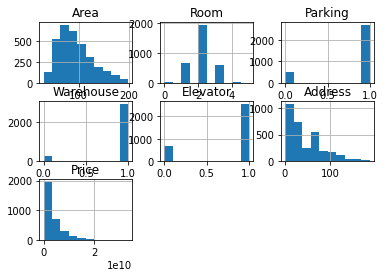

In [20]:
#histogram
viz = df[f]
viz.hist()
plt.show()

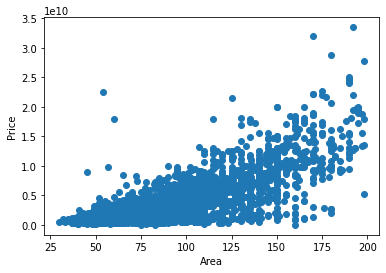

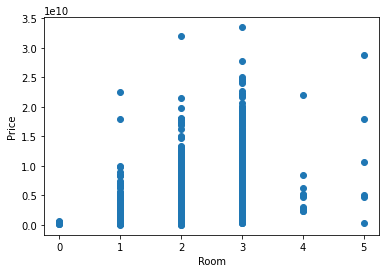

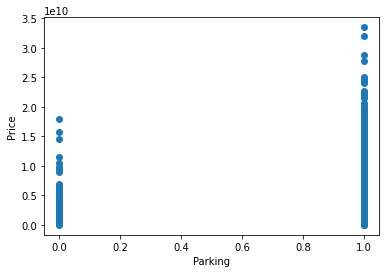

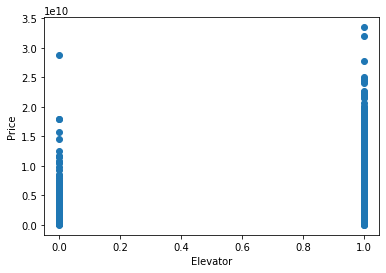

In [21]:
#scatter plot
plt.scatter(df.Area, df.Price)
plt.xlabel('Area')
plt.ylabel('Price')
plt.show()
plt.scatter(df.Room, df.Price)
plt.xlabel('Room')
plt.ylabel('Price')
plt.show()
plt.scatter(df.Parking, df.Price)
plt.xlabel('Parking')
plt.ylabel('Price')
plt.show()
plt.scatter(df.Elevator, df.Price)
plt.xlabel('Elevator')
plt.ylabel('Price')
plt.show()

In [22]:
#normalized dataframe
ndf=(df-df.mean())/df.std()

In [23]:
#define train / test data
X = np.asanyarray(ndf[['Area','Room','Parking','Elevator','Address']])
y = np.asanyarray(ndf[f[-1]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [24]:
#fit x, y
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)
print ('Coefficients: ', regr.coef_)

Coefficients:  [ 0.781362   -0.11485434  0.0688433   0.02682053  0.07168433]


In [25]:
#predict y_hat based on X_test
y_hat = regr.predict(X_test)
print("Residual sum of squares: %.2f" % np.mean((y_hat - y_test) ** 2))
print('Variance score: %.2f' % regr.score(X_test, y_test))

Residual sum of squares: 0.52
Variance score: 0.54
